Implement Isolation Forest for anomaly detection. Example: Detect outliers in the Iris dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Identify Outliers Using scatter plot

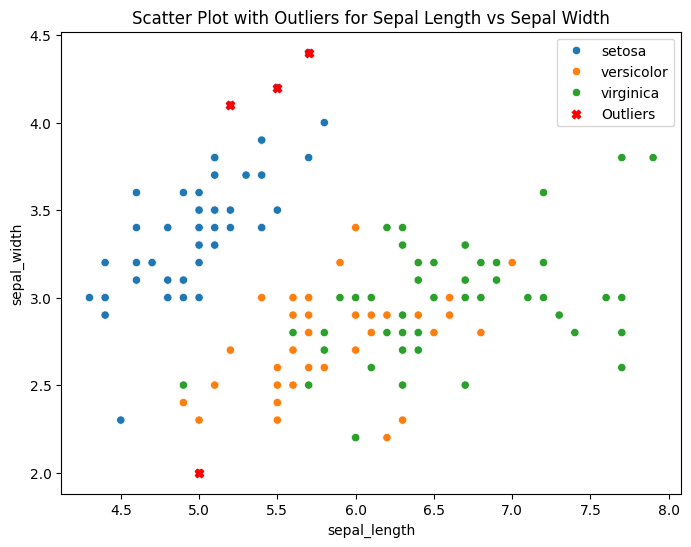

In [7]:
# Step 3: Calculate the IQR to detect outliers (using Sepal Length and Sepal Width as an example)
Q1 = df[['sepal_length', 'sepal_width']].quantile(0.25)
Q3 = df[['sepal_length', 'sepal_width']].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers: Data points outside 1.5 * IQR are outliers
outliers = ((df[['sepal_length', 'sepal_width']] < (Q1 - 1.5 * IQR)) | 
            (df[['sepal_length', 'sepal_width']] > (Q3 + 1.5 * IQR)))

# Step 4: Create a scatter plot for Sepal Length vs Sepal Width
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')

# Step 5: Highlight outliers in the plot
outlier_points = df[outliers.any(axis=1)]  # Select rows with any outlier
plt.scatter(outlier_points['sepal_length'], outlier_points['sepal_width'], color='red', label='Outliers', marker='X')

# Adding title and showing plot
plt.title("Scatter Plot with Outliers for Sepal Length vs Sepal Width")
plt.legend()
plt.show()

Identify Outliers Using box plot

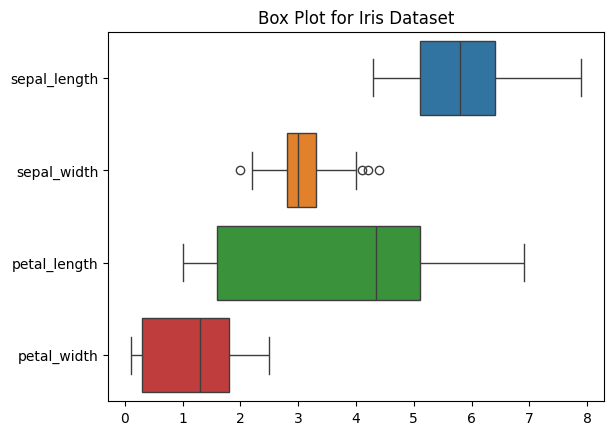

In [6]:
sns.boxplot(data=df, orient="h")
plt.title("Box Plot for Iris Dataset")
plt.show()

Show all data

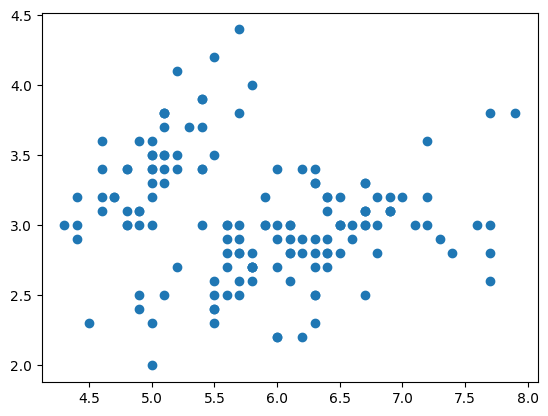

In [11]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

label_encoder = LabelEncoder()

# If the 'species' column contains categorical data
df['species'] = label_encoder.fit_transform(df['species'])


clf = IsolationForest(contamination='auto')
clf.fit(df)
predicitions = clf.predict(df)

In [43]:
predicitions 

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1])

In [44]:
index = np.where(predicitions < 0)
index

(array([  5,  13,  14,  15,  16,  18,  22,  23,  24,  32,  33,  41,  43,
         44,  50,  57,  60,  62,  70,  77,  93,  98, 100, 105, 106, 107,
        108, 109, 114, 117, 118, 119, 122, 125, 129, 130, 131, 134, 135,
        136, 144, 148]),)

In [45]:
x = df.values

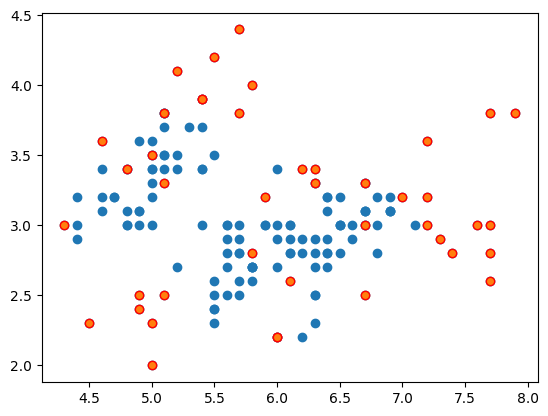

In [46]:
index = np.where(predicitions < 0)
plt.scatter(df.iloc[:,0], df.iloc[:,1])

plt.scatter(x[index,0] , x[index,1] , edgecolors='r')

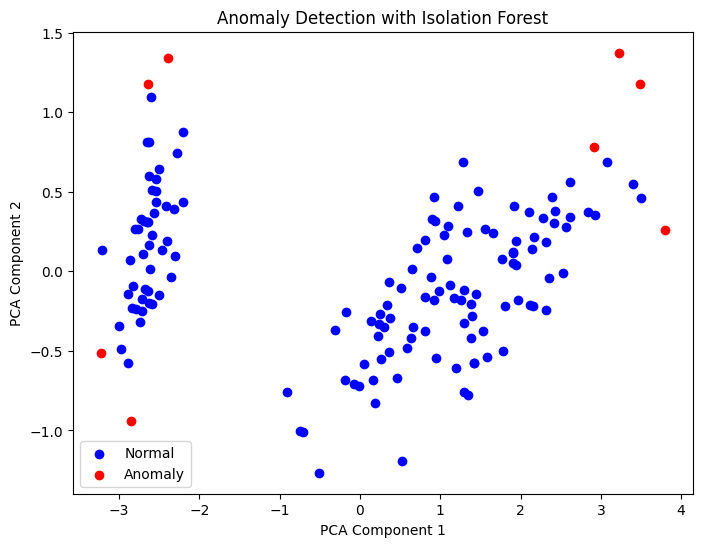

In [ ]:
from sklearn.decomposition import PCA

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% expected outliers
y_pred = iso_forest.fit_predict(X)  # Predict anomalies (1: normal, -1: anomaly)

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))

# Normal points (y_pred == 1) are blue
plt.scatter(X_pca[y_pred == 1, 0], X_pca[y_pred == 1, 1], c='blue', label='Normal')

# Anomalies (y_pred == -1) are red
plt.scatter(X_pca[y_pred == -1, 0], X_pca[y_pred == -1, 1], c='red', label='Anomaly')

plt.title('Anomaly Detection with Isolation Forest')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
